In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt

# Multi-armed bandit problem

## Bandit Environment

In [2]:
"""
Environment for the multi-armed bandit problem
"""




class bandit_env():
    """
    Initialize the multi-arm bandit environment.
    :params:
    r_mean: takes a list of reward mean
    r_stddev: takes a list of reward standard deviation
    """
    def __init__(self, r_mean, r_stddev):
        if len(r_mean) != len(r_stddev):
            raise ValueError("Reward distribution parameters (mean and variance) must be of the same length")

        if any(r <= 0 for r in r_stddev):
            raise ValueError("Standard deviation in rewards must all be greater than 0")

        self.n = len(r_mean)
        self.r_mean = r_mean
        self.r_stddev = r_stddev

    def pull(self, index_arm):
        """
        Performs the action of pulling the arm/lever of the selected bandit
        :inputs:
        index_arm: the index of the arm/level to be pulled
        :outputs:
        reward: the reward obtained by pulling tht arm (sampled from their corresponding Gaussian distribution)
        """
        reward = np.random.normal(self.r_mean[index_arm], self.r_stddev[index_arm])
        return reward

In [3]:
mean=[2.5, -3.5, 1.0, 5.0, -2.5]
variance=[0.33, 1.0, 0.66, 1.98, 1.65]
no_states=5

## ε-greedy algorithm

In [10]:
def epsilon_greedy_algorithm(bandit,loops,epsilon):
  q=[0 for i in range(bandit.n)]
  n=[0 for i in range(bandit.n)]
  choices=[i for i in range(bandit.n)]

  avg_reward_plot=[]

  avg_reward=0.0

  for loop in range(loops):

    r=random.random()
    choice_max=np.argmax(q)
    if r<epsilon:
      choices=[]
      for i in range(bandit.n):
        if i!=choice_max:
          choices.append(i)
      choice=random.sample(choices,1)[0]
    else:
      choice=choice_max
      

    return_reward=bandit.pull(choice)

    n[choice]=n[choice]+1
    q[choice]=q[choice]+(1/n[choice])*(return_reward-q[choice])

    avg_reward=(avg_reward*(loop)+q[choice])/(loop+1)
    
    avg_reward_plot.append(avg_reward)
  return q,avg_reward,avg_reward_plot

In [5]:
bandit=bandit_env(mean,variance)
epsilon=0.1
loops=1000

In [8]:
mean,avg_reward,plot=epsilon_greedy_algorithm(bandit,loops,0.1);

Text(0.5, 1.0, 'Epsilon=0.1')

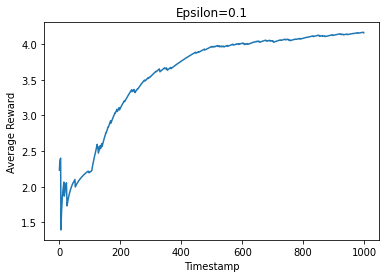

In [9]:
plt.plot(np.arange(0,loops),plot)
plt.xlabel("Timestamp")
plt.ylabel("Average Reward")
plt.title("Epsilon=0.1")

In [ ]:
np.add([2],[3])

array([5])

In [52]:
avg_rewards_plot=[]
epsilon=[1/(2**i) for i in range(10,1,-1)]
rewards=np.zeros(len(epsilon))
sim=100
for j in range(sim):
  for i in range(len(epsilon)):
    mean,avg_reward,plot=epsilon_greedy_algorithm(bandit,loops,epsilon[i])
    rewards[i]+=avg_reward
epsilon_EG=epsilon
rewards_EG=rewards/sim

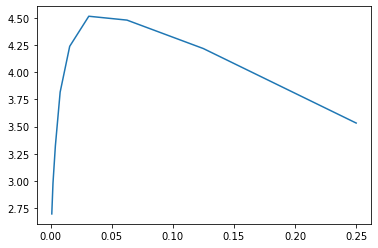

In [53]:
plt.plot(epsilon_EG,rewards_EG)

In [ ]:
epsilon

[0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1.0]

## UCB algorithm

In [15]:
def UCB(bandit,loops,c):
  q=[0 for i in range(bandit.n)]
  n=[0 for i in range(bandit.n)]
  choices=[i for i in range(bandit.n)]

  avg_reward=0.0
  rewards=[]

  for loop in range(loops):

    if loops>0:
      q1=np.add(q,[c*((2*np.log(loop)/n[i])**0.5) for i in range(bandit.n)] )
      choice=np.argmax(q1)
    else:
      choice=np.argmax(q)

    return_reward=bandit.pull(choice)

    n[choice]=n[choice]+1
    q[choice]=q[choice]+(1/n[choice])*(return_reward-q[choice])

    avg_reward=(avg_reward*(loop)+q[choice])/(loop+1)

    rewards.append(avg_reward)
  
  return q,avg_reward,rewards

In [16]:
mean,avg_reward,plot=UCB(bandit,loops,0.1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


Text(0.5, 1.0, 'C=0.1')

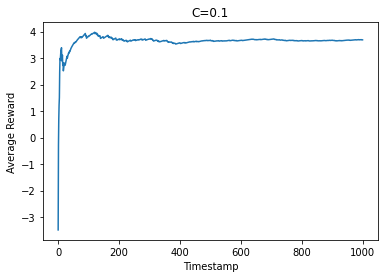

In [126]:
plt.plot(np.arange(0,loops),plot)
plt.xlabel("Timestamp")
plt.ylabel("Average Reward")
plt.title("C=0.1")

In [103]:
epsilon=[1/(2**i) for i in range(40,-10,-5)]
rewards=np.zeros(len(epsilon))
sim=100
for j in range(sim):
  for i in range(len(epsilon)):
    mean,avg_reward,rewards_plot=UCB(bandit,loops,epsilon[i])
    rewards[i]+=avg_reward
epsilon_UCB=epsilon
rewards_UCB=rewards/sim

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


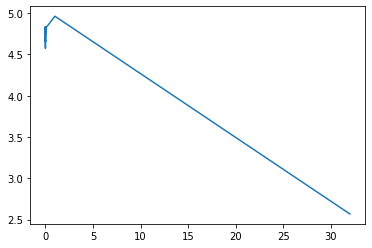

In [104]:
plt.plot(epsilon_UCB,rewards_UCB)

In [24]:
rewards

array([475.14787616, 470.46007853, 475.37394381, 480.08553495,
       486.71667995, 477.14336467, 465.77744505, 490.01960241,
       462.75104563, 472.69166406, 484.37077276, 473.0670681 ,
       463.30885047, 478.9296357 , 482.46771959, 486.50765122,
       480.26333677, 482.58233499, 480.18904709, 465.30209288,
       498.05582055, 257.13996506])

## Greedy with the optimistic initial value method

In [26]:
def Greedy_with_optmistic_initiation(bandit,loops,Q_o):
  q=[Q_o for i in range(bandit.n)]
  n=[0 for i in range(bandit.n)]
  choices=[i for i in range(bandit.n)]

  avg_reward=0.0
  rewards=[]

  for loop in range(loops):
    choice=np.argmax(q)
      
    return_reward=bandit.pull(choice)

    n[choice]=n[choice]+1
    q[choice]=q[choice]+(1/n[choice])*(return_reward-q[choice])

    avg_reward=avg_reward+(1/(loop+1))*(q[choice]-avg_reward)

    rewards.append(avg_reward)
  
  return q,avg_reward,rewards

In [28]:
a,b,rewards_plot=Greedy_with_optmistic_initiation(bandit,loops,5)

Text(0.5, 1.0, 'Q0=5')

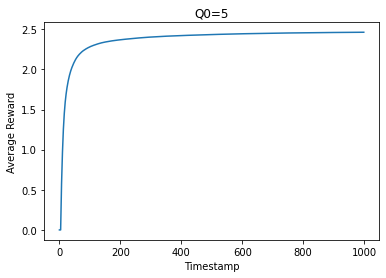

In [125]:
plt.plot(np.arange(0,loops),rewards_plot)
plt.xlabel("Timestamp")
plt.ylabel("Average Reward")
plt.title("Q0=5")

In [122]:
epsilon=[1/(2**i) for i in range(30,-70,-10)]
rewards=np.zeros(len(epsilon))
sim=100
for j in range(sim):
  for i in range(len(epsilon)):
    mean,avg_reward,rewards_plot=Greedy_with_optmistic_initiation(bandit,loops,epsilon[i])
    rewards[i]+=avg_reward
epsilon_OIV=epsilon
rewards_OIV=rewards/sim

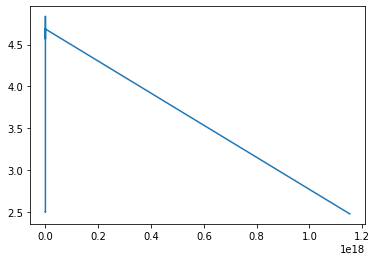

In [123]:
plt.plot(epsilon_OIV,rewards_OIV)

## Gradient bandit algorithm

In [35]:
def softmax(x):
  exp=[np.exp(i)-np.mean(x) for i in x]
  return exp/np.sum(exp)

In [55]:
def Gradient_Bandit_Algorithm(bandit,loops,alpha):

  #alpha=0.1
  k=bandit.n

  q=[0 for i in range(bandit.n)]
  n=[0 for i in range(bandit.n)]
  H=[0 for i in range(bandit.n)]

  mean_reward=0.0
  rewards=[]

  for loop in range(1,loops):
    p=softmax(H)
    a=np.argmax(p)
    r=bandit.pull(a)
    n[a]=n[a]+1
    mean_reward=mean_reward+(r-mean_reward)/loop
    rewards.append(mean_reward)
    H[a]=H[a]+(r-mean_reward)/n[a]
    q[a]=q[a]+(alpha)*(r-mean_reward)*(1-p[a])

    for i in range(k):
      if i!=a:
        q[i]=q[i]-(alpha)*(r-mean_reward)*(p[i])

  return q,mean_reward,rewards

In [167]:
alpha=[1/(2**i) for i in range(100,-100,-20)]
rewards=np.zeros(len(alpha))
sim=100
for j in range(sim):
  for i in range(len(alpha)):
    mean,avg_reward,plot_rewards=Gradient_Bandit_Algorithm(bandit,loops,alpha[i])
    rewards[i]+=avg_reward
rewards_GD=rewards/sim
epsilon_GD=alpha

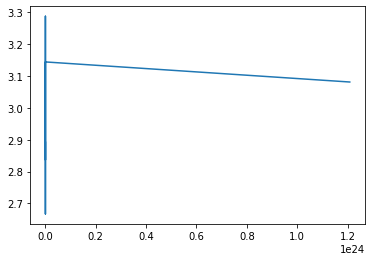

In [168]:
plt.plot(epsilon_GD,rewards_GD)

In [132]:
rewards_GD

array([2.88558901, 2.62857256, 3.0046864 , 2.95067534, 2.71581871,
       2.99768788])

Text(0.5, 1.0, 'Alpha=0.1')

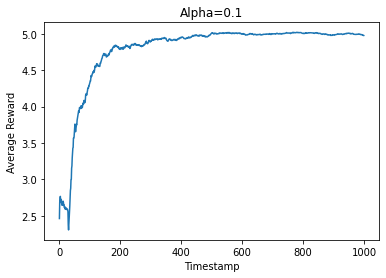

In [163]:
a,b,rewards_plot=Gradient_Bandit_Algorithm(bandit,loops,0.01)
plt.plot(np.arange(1,loops),rewards_plot)
plt.xlabel("Timestamp")
plt.ylabel("Average Reward")
plt.title("Alpha=0.1")

## Comparison Plots

Text(0.5, 1.0, 'Performance of Various Models for Multi-Bandit Problem')

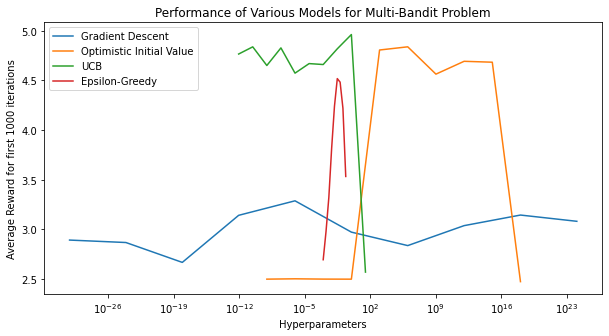

In [169]:
plt.figure(figsize=(10,5))
plt.plot(epsilon_GD,rewards_GD,label="Gradient Descent")
plt.plot(epsilon_OIV,rewards_OIV,label="Optimistic Initial Value")
plt.plot(epsilon_UCB,rewards_UCB,label="UCB")
plt.plot(epsilon_EG,rewards_EG,label="Epsilon-Greedy")
plt.xscale("log")
plt.legend()
plt.xlabel("Hyperparameters")
plt.ylabel("Average Reward for first 1000 iterations")
plt.title("Performance of Various Models for Multi-Bandit Problem")

# Markov Decision Process

## Using this information, design a finite MDP by writing down the possible combinations of states, actions, transition probability from one state to another for a given action, and rewards in a tabular form. Also, draw a diagram of the MDP from the information mentioning the probability and rewards.

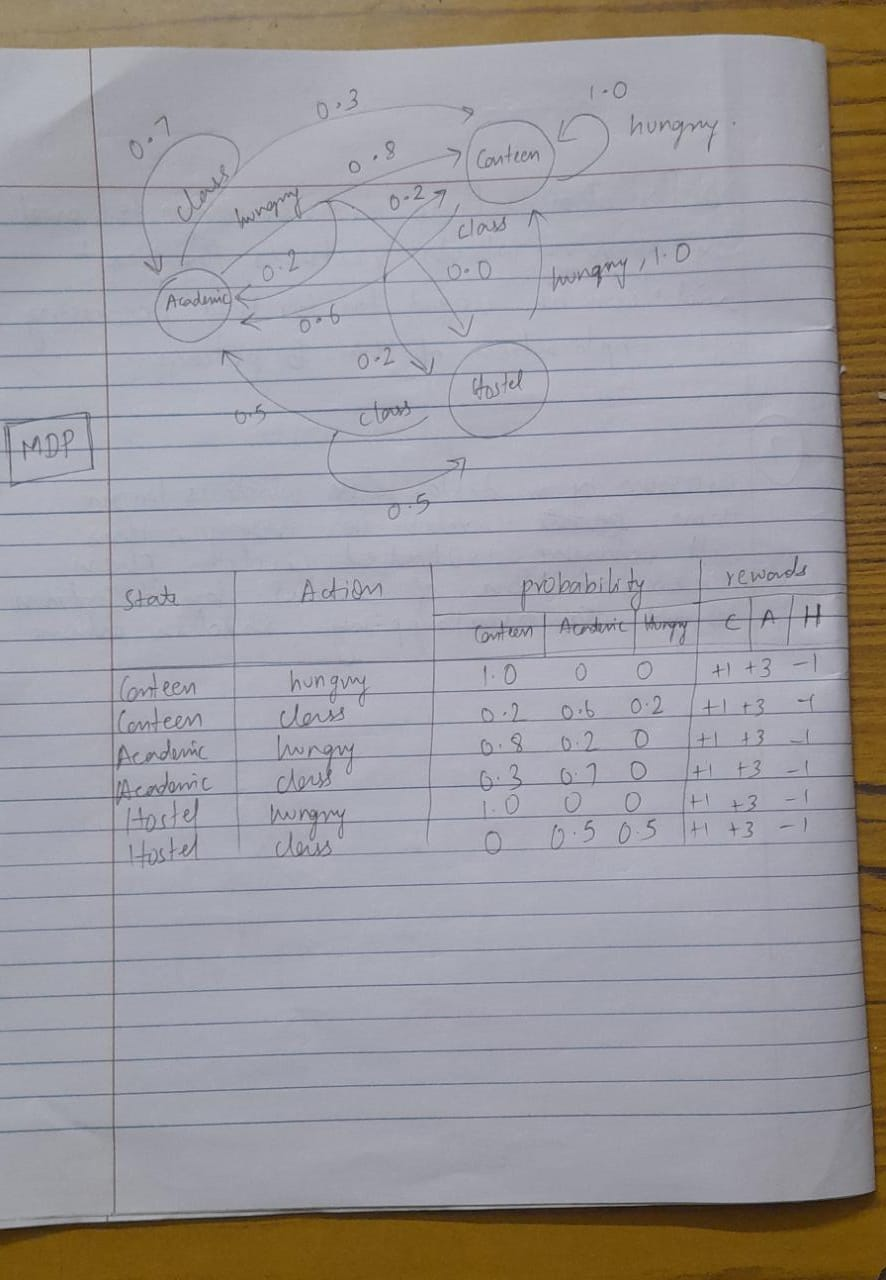

## Based on the designed MDP perform value iteration and show the optimal value for each state and the policy obtained.

In [ ]:
MC={("Canteen","Class"):{},("Academic","Class"):{},("Hostel","Class"):{},
    ("Canteen","Hungry"):{},("Academic","Hungry"):{},("Hostel","Hungry"):{}}

In [ ]:
MC[("Canteen","Class")]={"Canteen":0.2,"Academic":0.6,"Hostel":0.2}
MC[("Canteen","Hungry")]={"Canteen":1.0,"Academic":0.0,"Hostel":0.0}
MC[("Academic","Hungry")]={"Canteen":0.8,"Academic":0.2,"Hostel":0.0}
MC[("Academic","Class")]={"Canteen":0.3,"Academic":0.7,"Hostel":0.0}
MC[("Hostel","Class")]={"Canteen":0.0,"Academic":0.5,"Hostel":0.5}
MC[("Hostel","Hungry")]={"Canteen":1.0,"Academic":0.0,"Hostel":0.0}

In [ ]:
def value_iteration(env,no_states,no_actions,states,actions,rewards,gamma=0.97):
  value_table=np.zeros(no_states)
  iter=10
  threshold=1e-20

  for i in range(iter):
    updated_table=np.copy(value_table)
    for state in range(no_states):
      q_value=[]
      for action in actions:
        next_states_reward=[]
        for next_state in range(3):
          transition_probability=env[(states[state],action)][states[next_state]]
          reward=rewards[states[next_state]]
          next_states_reward.append(transition_probability*(reward+gamma*updated_table[next_state]))
        q_value.append(np.sum(next_states_reward))
      value_table[state]=np.max(q_value)

    if np.sum(np.fabs(updated_table-value_table)) <= threshold:
      print("Value Convergence at iteration:",i)
      break
  return value_table

In [ ]:
no_states=3
no_actions=2
states=["Canteen","Academic","Hostel"]
actions=["Hungry","Class"]
rewards={"Canteen":1,"Academic":3,"Hostel":-1}

In [ ]:
value_table=value_iteration(MC,no_states,no_actions,states,actions,rewards)

Value Convergence at iteration: 1090


In [ ]:
value_table

array([70.33837025, 71.2413263 , 69.22821914])

In [ ]:
def extract_policy(env,value_table,no_states,no_actions,states,actions,rewards,gamma=0.97):
  policy=np.zeros(no_states)
  for state in range(no_states):
    q_table=np.zeros(no_actions)
    for action in range(no_actions):
      for i,next_state in enumerate(env[(states[state],actions[action])]):
        transition_probability=env[(states[state],actions[action])][next_state]
        reward=rewards[next_state]
        #print(q_table,transition_probability,reward,value_table)
        q_table[action]+=transition_probability*(reward+gamma*value_table[i])
    policy[state]=np.argmax(q_table)
  return policy

In [ ]:
optimal_policy=extract_policy(MC,value_table,no_states,no_actions,states,actions,rewards)

In [ ]:
optimal_policy

array([1., 1., 0.])

## Based on the designed MDP perform policy iteration and show the optimal policy.

In [ ]:
def compute_value_function(env,policy,no_states,no_actions,states,actions,rewards,gamma=0.97):
  value_table=np.zeros(no_states,dtype=np.int)
  threshold=1e-21
  i=0
  while True:
    #print("*******")
    updated_table=np.copy(value_table)
    for state in range(no_states):
      action=int(policy[state])
      next_states_reward=[]
      for next_state in range(no_states):
        #print(state,action)
        transition_probability=env[(states[state],actions[action])][states[next_state]]
        reward=rewards[states[next_state]]
        next_states_reward.append(transition_probability*(reward+gamma*updated_table[next_state]))
      value_table[state]=np.sum(next_states_reward)
    
    i+=1
    if np.sum(np.fabs(updated_table-value_table)) <= threshold:
      print("Value Convergence at iteration:",i)
      break

  return value_table

In [ ]:
def policy_iteration(env,no_states,no_actions,states,actions,rewards,gamma=0.97):
  random_policy=np.zeros(no_states,dtype=np.int)
  no_of_iterations=10000
  
  for i in range(no_of_iterations):
    
    new_value_function= compute_value_function(env,random_policy,no_states,no_actions,states,actions,rewards,gamma=0.97)
    new_policy=extract_policy(env,value_table,no_states,no_actions,states,actions,rewards,gamma=0.97)

    if (np.all(random_policy==new_policy)):
      break
    random_policy=new_policy
  return new_policy

In [ ]:
policy_iteration(MC,no_states,no_actions,states,actions,rewards,gamma=0.97)

Value Convergence at iteration: 3
Value Convergence at iteration: 45


array([1., 1., 0.])

## Discuss the results obtained from policy iteration and value iteration

 The best policy is to move from academic to academic , from canteen to academic and from hostel to academic building , this makes sense as the acdemic building has maximum reward of 3 and hostel to canteen makes sense as canteen has reward 1 and hostel being the worst place with reward -1.The value iterations obtained also make sense with academic building having maximum value , followed by canteen and then hostel like their rewards suggest